# Update
- 2/11 15:24

# Cell 0. Data 준비

In [1]:
# import os
# import scipy.io as sio
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

In [2]:
# import scipy.io

# # MATLAB 파일 경로
# file_path = r"C:\Users\ChoiSeongHyeon\Desktop\Dataset\UOS\BearingType_DeepGrooveBall\SamplingRate_16000\RotatingSpeed_1000\H_B_16_6204_1000.mat"

# def print_mat_contents(file_path):
#     try:
#         # MATLAB 파일 로드
#         mat_contents = scipy.io.loadmat(file_path)
        
#         # MATLAB 파일 내용 출력
#         print("MATLAB 파일의 키 목록:")
#         for key in mat_contents.keys():
#             # 내부 데이터 구조를 확인하기 위해 데이터의 타입과 샘플 출력
#             print(f"- {key}: {type(mat_contents[key])}")
#             if isinstance(mat_contents[key], (list, dict, tuple)):
#                 print(f"  샘플 데이터: {mat_contents[key][:2]}")
#             elif hasattr(mat_contents[key], 'shape'):
#                 print(f"  데이터 형상(shape): {mat_contents[key].shape}")
#             else:
#                 print(f"  값: {mat_contents[key]}")

#     except Exception as e:
#         print(f"MATLAB 파일을 읽는 중 오류가 발생했습니다: {e}")

# # 함수 실행
# print_mat_contents(file_path)


데이터 Sampling  
- Origin Data -> Test, Validation, Train (6:2:2)로 구분
- SAMPLE_SIZE : 2,048, SHIFT_SIZE : 1,024

Origin 파일의 길이 : 1280,000  
Shift Size : 1024  
따라서, 1,250개의 샘플 생성되어야 함.

In [3]:
# pip install scipy numpy tqdm

# import os
# import numpy as np
# import scipy.io
# import pandas as pd
# from tqdm import tqdm

# # 기본 경로 설정
# BASE_DIR = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\Dataset\UOS"
# FAULT_TYPES = ["H", "B", "IR", "OR"]
# SPLIT_RATIOS = (0.6, 0.2, 0.2)  # Train: 60%, Val: 20%, Test: 20%
# SAMPLE_SIZE = 2048
# SHIFT_SIZE = 1024

# def load_mat_file(file_path):
#     """ .mat 파일에서 'Data' 키를 가진 데이터를 불러옴 """
#     mat_data = scipy.io.loadmat(file_path)
#     if 'Data' in mat_data:
#         return mat_data['Data'].flatten()  # 1D 배열로 변환
#     else:
#         raise KeyError(f"'Data' key not found in {file_path}")

# def split_data(data, split_ratios):
#     """ 데이터를 Train, Validation, Test로 분할 """
#     total_len = len(data)
#     train_end = int(total_len * split_ratios[0])
#     val_end = train_end + int(total_len * split_ratios[1])

#     train_data = data[:train_end]
#     val_data = data[train_end:val_end]
#     test_data = data[val_end:]

#     return train_data, val_data, test_data

# def save_csv_file(file_path, data):
#     """ 데이터를 CSV 파일로 저장 (단일 열 형태) """
#     df = pd.DataFrame(data)  # ✅ 단일 열(column) 형태로 변환
#     df.to_csv(file_path, index=False, header=False)  # ✅ 열 이름 없이 저장

# def create_samples(data, save_dir, base_filename):
#     """ 데이터를 2048 크기로 1024씩 이동하며 개별 CSV 파일로 저장 """
#     os.makedirs(save_dir, exist_ok=True)
#     num_samples = int((len(data) / SHIFT_SIZE) - 1)

#     for i in range(num_samples):
#         start = i * SHIFT_SIZE
#         end = start + SAMPLE_SIZE
#         if end > len(data):  
#             break

#         sample = data[start:end]
#         sample_filename = os.path.join(save_dir, f"{base_filename}_{i+1}.csv")
#         save_csv_file(sample_filename, sample)

# def process_fault_type(fault_type):
#     """ 각 Fault Type 폴더의 파일을 처리 """
#     fault_dir = os.path.join(BASE_DIR, fault_type, "Origin")
#     split_dir = os.path.join(BASE_DIR, fault_type, "Train_Val_Test_Split")
#     samples_dir = os.path.join(BASE_DIR, fault_type, "Samples")

#     os.makedirs(split_dir, exist_ok=True)
#     os.makedirs(samples_dir, exist_ok=True)

#     # Origin 폴더 내 모든 .mat 파일 처리
#     for file in tqdm(os.listdir(fault_dir), desc=f"Processing {fault_type}"):
#         if not file.endswith(".mat"):
#             continue

#         file_path = os.path.join(fault_dir, file)
#         base_name = file.replace(".mat", "")

#         try:
#             # .mat 파일 로드
#             data = load_mat_file(file_path)
            
#             # Train, Validation, Test 데이터 분할
#             train_data, val_data, test_data = split_data(data, SPLIT_RATIOS)

#             # Train, Validation, Test 데이터를 CSV 파일로 저장
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Train.csv"), train_data)
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Validation.csv"), val_data)
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Test.csv"), test_data)

#             # Train, Validation, Test 데이터에서 개별 샘플 생성 및 저장
#             create_samples(train_data, samples_dir, f"{base_name}_Train")
#             create_samples(val_data, samples_dir, f"{base_name}_Validation")
#             create_samples(test_data, samples_dir, f"{base_name}_Test")

#         except Exception as e:
#             print(f"Error processing {file}: {e}")

# # 모든 Fault Type에 대해 실행
# for fault in FAULT_TYPES:
#     process_fault_type(fault)

# print("✅ 모든 데이터 처리가 완료되었습니다!")


In [4]:
# import os
# import re
# from collections import defaultdict

# # 데이터셋 경로
# dataset_path = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\Dataset\UOS"

# # Fault Types
# fault_types = ["B", "H", "IR", "OR"]

# # RPM 및 데이터 유형별 샘플 개수 저장용 딕셔너리
# sample_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# # 파일명 정규식 패턴
# pattern = re.compile(r"H_(B|H|IR|OR)_16_6204_(\d+)_(Train|Validation|Test)_\d+\.csv")

# # 각 Fault Type 폴더를 순회하며 파일 개수 집계
# for fault in fault_types:
#     samples_path = os.path.join(dataset_path, fault, "Samples")

#     if not os.path.exists(samples_path):
#         print(f"경로 없음: {samples_path}")
#         continue

#     for filename in os.listdir(samples_path):
#         match = pattern.match(filename)
#         if match:
#             fault_type, rpm, data_type = match.groups()
#             sample_counts[fault_type][rpm][data_type] += 1

# # 결과 출력
# for fault in fault_types:
#     print(f"\nFault Type: {fault}")
#     for rpm in ["600", "800", "1000", "1200", "1400", "1600"]:
#         train_count = sample_counts[fault][rpm]["Train"]
#         val_count = sample_counts[fault][rpm]["Validation"]
#         test_count = sample_counts[fault][rpm]["Test"]
#         print(f"  RPM {rpm}: Train {train_count}, Validation {val_count}, Test {test_count}")


H : 0, IR : 1, OR : 2, B : 3  

# Cell 1.

In [ ]:
import os
import torch
from torch.utils.data import DataLoader
import pickle
import numpy as np
from utils import (
    set_seed,
    UOSDataset, 
    get_dataloaders, 
    train_model_original, 
    evaluate_model_original,
    fine_tune_and_evaluate, 
    fine_tune_and_evaluate_structured,
    plot_validation_accuracies, 
    evaluate_pruned_models,
    evaluate_structured_models
)
from Model import WDCNN

set_seed(42)

In [ ]:
# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if torch.cuda.is_available():
    print("GPU device name:", torch.cuda.get_device_name(0))
else:
    print("GPU not available, using CPU.")

Using device: cuda
GPU device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [ ]:
###############################
# 1. 원본 모델 학습 및 평가 (Option 1)
###############################
# 원본 데이터셋 로드
train_dataset = UOSDataset("Train")
val_dataset   = UOSDataset("Validation")
test_dataset  = UOSDataset("Test")

c:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\UOS\utils.py:65: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(1)


In [ ]:
# # 여러 배치 크기에 대해 원본 모델 학습 (최종 모델은 UOS\Parameters\best_overall_model.pth에 저장됨)
# train_model_original(train_dataset, val_dataset, batch_sizes=[32, 64, 128, 256],
#                                        num_epochs=100, learning_rate=0.01, patience=10)


🔹 Training with Batch Size: 32
✅ Initial weights saved for batch 32!


c:\Users\ChoiSeongHyeon\anaconda3\envs\WinningT\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1: Batch 32, LR: 0.010000, Train Acc: 0.8780, Val Acc: 0.9886
✅ Best model saved (Batch 32) with val_acc 0.9886
Epoch 2: Batch 32, LR: 0.010000, Train Acc: 0.9773, Val Acc: 0.9940
✅ Best model saved (Batch 32) with val_acc 0.9940
Epoch 3: Batch 32, LR: 0.010000, Train Acc: 0.9909, Val Acc: 0.9965
✅ Best model saved (Batch 32) with val_acc 0.9965
Epoch 4: Batch 32, LR: 0.010000, Train Acc: 0.9895, Val Acc: 0.9988
✅ Best model saved (Batch 32) with val_acc 0.9988
Epoch 5: Batch 32, LR: 0.010000, Train Acc: 0.9904, Val Acc: 0.9885
Epoch 6: Batch 32, LR: 0.010000, Train Acc: 0.9962, Val Acc: 0.9968
Epoch 7: Batch 32, LR: 0.010000, Train Acc: 0.9977, Val Acc: 0.9940
Epoch 8: Batch 32, LR: 0.010000, Train Acc: 0.9940, Val Acc: 0.9856


KeyboardInterrupt: 


📌 Classification Report:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00      1494
          IR       1.00      1.00      1.00      1494
          OR       1.00      1.00      1.00      1494
           B       1.00      1.00      1.00      1494

    accuracy                           1.00      5976
   macro avg       1.00      1.00      1.00      5976
weighted avg       1.00      1.00      1.00      5976



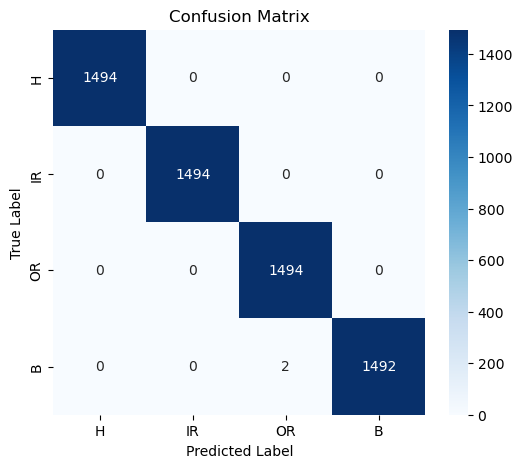

In [ ]:
# 원본 모델 평가
model = WDCNN().to(device)
# best_overall_model.pth의 경로 (환경에 맞게 수정)
best_model_path = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\UOS\Parameters\best_overall_model.pth"
checkpoint = torch.load(best_model_path, map_location=device)
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
evaluate_model_original(model, test_loader, device)

# Cell 2. One-Shot Pruning

## Cell 2.1 One-Shot Pruning(Unstructured)

In [ ]:
###############################
# 2. Unstructured Pruning 실험 및 평가 (Option 2)
###############################
print("\n=== [Option 2] Unstructured Pruning Fine-Tuning & Evaluation ===")
# DataLoader 생성 (배치 크기 64)
train_loader, val_loader, test_loader = get_dataloaders(batch_size=64)
pruning_ratios = [0.2, 0.4, 0.6, 0.8]
unstructured_results_file = "unstructured_results.pkl"


=== [Option 2] Unstructured Pruning Fine-Tuning & Evaluation ===


In [ ]:
# 이미 학습한 결과가 있으면 불러오고, 없으면 학습 후 저장
if os.path.exists(unstructured_results_file):
    with open(unstructured_results_file, "rb") as f:
        unstructured_experiment_results = pickle.load(f)
    print("Loaded saved Unstructured Pruning experiment results.")
else:
    unstructured_experiment_results = fine_tune_and_evaluate(pruning_ratios, train_loader, val_loader, num_epochs=100)
    with open(unstructured_results_file, "wb") as f:
        pickle.dump(unstructured_experiment_results, f)
    print("Saved Unstructured Pruning experiment results.")

Loaded saved Unstructured Pruning experiment results.



=== Plotting Unstructured Validation Accuracies ===


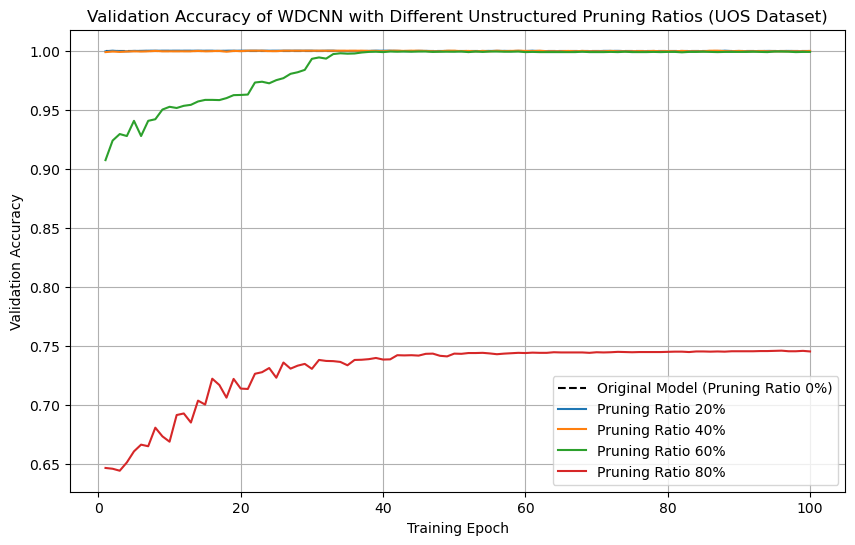

In [ ]:
# [Option 2-2] 원본 vs Unstructured Pruned 모델 Validation Accuracy Plot
print("\n=== Plotting Unstructured Validation Accuracies ===")
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load(best_model_path, map_location=device))
num_epochs_plot = 100
original_val_accuracies = []
with torch.no_grad():
    for epoch in range(num_epochs_plot):
        original_model.eval()
        correct = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = original_model(inputs)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
        original_val_accuracies.append(correct / len(val_loader.dataset))
# unstructured_experiment_results는 fine_tune_and_evaluate()의 반환값
plot_validation_accuracies(original_val_accuracies, unstructured_experiment_results, num_epochs_plot)


In [ ]:
# Test 평가 (Unstructured Pruned Models)
print("\n=== Test Evaluation of Unstructured Pruned Models ===")
results_df_unstructured = evaluate_pruned_models(test_loader, unstructured_experiment_results)
print("Unstructured Pruning Test Evaluation Results:")
display(results_df_unstructured)


=== Test Evaluation of Unstructured Pruned Models ===
Unstructured Pruning Test Evaluation Results:


,Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,37308,0.000867,0.999665
1,0.2,30005,0.001037,0.999498
2,0.4,22703,0.000846,0.999665
3,0.6,15401,0.000882,0.999498
4,0.8,8099,0.000847,0.747657


## Cell 2.2 One-Shot Pruning (Structured)

In [ ]:
###############################
# 3. Structured Pruning 실험 및 평가 (Option 3)
###############################
print("\n=== [Option 3] Structured Pruning Fine-Tuning & Evaluation ===")
structured_results_file = "structured_results.pkl"
if os.path.exists(structured_results_file):
    with open(structured_results_file, "rb") as f:
        structured_experiment_results = pickle.load(f)
    print("Loaded saved Structured Pruning experiment results.")
else:
    structured_experiment_results = fine_tune_and_evaluate_structured(pruning_ratios, train_loader, val_loader, num_epochs=100, n=2, dim=0)
    with open(structured_results_file, "wb") as f:
        pickle.dump(structured_experiment_results, f)
    print("Saved Structured Pruning experiment results.")


=== [Option 3] Structured Pruning Fine-Tuning & Evaluation ===

🔹 Structured Fine-tuning with Pruning Amount: 0.2
Epoch 1: Structured Pruning 0.2, Train Acc: 0.9970, Val Acc: 0.9988
Epoch 2: Structured Pruning 0.2, Train Acc: 0.9984, Val Acc: 0.9993
Epoch 3: Structured Pruning 0.2, Train Acc: 0.9982, Val Acc: 0.9993
Epoch 4: Structured Pruning 0.2, Train Acc: 0.9983, Val Acc: 0.9998
Epoch 5: Structured Pruning 0.2, Train Acc: 0.9994, Val Acc: 0.9998
Epoch 6: Structured Pruning 0.2, Train Acc: 0.9992, Val Acc: 0.9998
Epoch 7: Structured Pruning 0.2, Train Acc: 0.9994, Val Acc: 0.9998
Epoch 8: Structured Pruning 0.2, Train Acc: 0.9992, Val Acc: 0.9998
Epoch 9: Structured Pruning 0.2, Train Acc: 0.9997, Val Acc: 0.9998
Epoch 10: Structured Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9998
Epoch 11: Structured Pruning 0.2, Train Acc: 0.9997, Val Acc: 0.9998
Epoch 12: Structured Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9998
Epoch 13: Structured Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.99


=== Plotting Structured Pruning Validation Accuracies ===


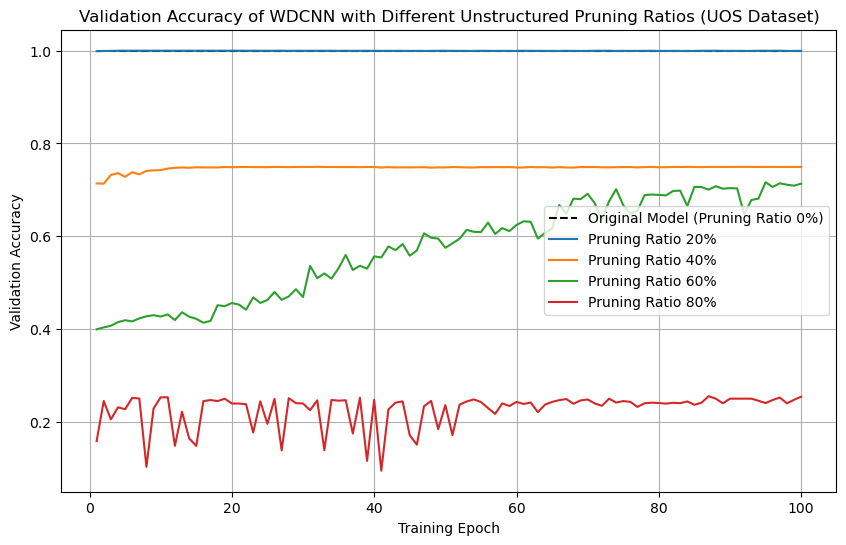

In [ ]:
# [Option 3-2] Structured Pruning Validation Accuracy Plot
print("\n=== Plotting Structured Pruning Validation Accuracies ===")
original_model_struct = WDCNN().to(device)
original_model_struct.load_state_dict(torch.load(best_model_path, map_location=device))
num_epochs_plot = 100
original_val_accuracies_structured = []
with torch.no_grad():
    for epoch in range(num_epochs_plot):
        original_model_struct.eval()
        correct = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = original_model_struct(inputs)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
        original_val_accuracies_structured.append(correct / len(val_loader.dataset))
plot_validation_accuracies(original_val_accuracies_structured, structured_experiment_results, num_epochs_plot)

In [ ]:
# Test 평가 (Structured Pruned Models)
print("\n=== Test Evaluation of Structured Pruned Models ===")
results_df_structured = evaluate_structured_models(test_loader, structured_experiment_results)
print("Structured Pruning Test Evaluation Results:")
display(results_df_structured)


=== Test Evaluation of Structured Pruned Models ===
Structured Pruning Test Evaluation Results:


,Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,37308,0.000843,0.999665
1,0.2,29972,0.000863,0.999665
2,0.4,22604,0.000785,0.750000
3,0.6,15500,0.000863,0.714692
4,0.8,8132,0.000786,0.258367


# Cell 3. Iterative Pruning

# Cell 4. Winning Ticket